In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
import xtrack as xt
import xcoll as xc
import xpart as xp
import xobjects as xo

In my simulations on ht condor, I forgot to add e-3 to the jaw positions of the tidp, so they were placed in m instead of mm and was invisible, until a bump of -40mm ish.

Conclusion:
- It is visible already at -10mm if the jaw positions are in mm 

# -10mm bump

In [2]:
line = xt.Line.from_json('../injection_lines/sps_with_aperture_inj_q20_beam_sagitta2.json')

Loading line from dict:   0%|          | 0/36395 [00:00<?, ?it/s]

Done loading line from dict.           


In [3]:
#Preping line for bump
env = line.env

line['bump.11207'] = 0
line['bump.11407'] = 0
line['bump.11607'] = 0
line['bump.12207'] = 0

line.ref['mdh.11207'].knl[0] += line.vars['bump.11207']
line.ref['mdh.11407'].knl[0] += line.vars['bump.11407']
line.ref['mdh.11607'].knl[0] += line.vars['bump.11607']
line.ref['mdh.12207'].knl[0] += line.vars['bump.12207']

In [8]:
#Context and parameters
context = xo.ContextCpu()

num_particles  = 1000
plane = 'DPneg'
sweep = 6000
sweep = -abs(sweep) if plane == 'DPpos' else abs(sweep)
num_turns = 6000

In [5]:
#Setting cavities to the same frequency and phase, plus setting the voltage
cavity_elements, cavity_names = line.get_elements_of_type(xt.Cavity)

for name in cavity_names:
    line[name].frequency = 200e6
    line[name].lag = 180
line['actcse.31632'].voltage = 3.5e6

In [6]:
#Installing TIDP
tidp_ap_tot = 147e-3
block_mvt = 29e-3

tidp = xc.EverestCollimator(length=4.3, material=xc.materials.Carbon, jaw_L= tidp_ap_tot/2 + block_mvt, jaw_R = -tidp_ap_tot/2 + block_mvt)
line.collimators.install(names=['tidp.11434'], elements=[tidp])

Slicing line:   0%|          | 0/75252 [00:00<?, ?it/s]

In [7]:
tw = line.twiss()
opt = line.match(
    solve=False,
    start='mdh.11007',
    end='mdhw.11732',
    init=tw,
    vary=[
        xt.VaryList(['bump.11207', 'bump.11407', 'bump.11607'], step=1e-8, tag='bump',)
    ],
    targets = [
        xt.Target('x', -10e-3, at='tidp.11434'),
        xt.TargetSet(['x', 'px'], value=tw, at='mdhw.11732')
    ]
    )
opt.run_jacobian(10)

                                             
Optimize - start penalty: 0.09974                           
Matching: model call n. 11 penalty = 1.5340e-09              
Optimize - end penalty:  1.53398e-09                            


In [9]:
line.build_tracker()
part = xp.generate_matched_gaussian_bunch(nemitt_x=3.5e-6,
                                          nemitt_y=3.5e-6,
                                          sigma_z=0.224, num_particles=num_particles, line=line)

The line already has an associated tracker
*** Maximum RMS bunch length 0.2361011021355421m.
... distance to target bunch length: -2.2226e-01
... distance to target bunch length: 5.5784e-03
... distance to target bunch length: 5.2361e-03
... distance to target bunch length: -6.3267e-03
... distance to target bunch length: 1.9948e-03
... distance to target bunch length: -3.8258e-04
... distance to target bunch length: 5.3833e-05
... distance to target bunch length: 1.2594e-06
... distance to target bunch length: -1.0995e-10
... distance to target bunch length: 1.2805e-07
--> Bunch length: 0.22399999989004873
--> Emittance: 0.3170913627960028


In [10]:
line.discard_tracker()
line.build_tracker(_context=xo.ContextCpu(omp_num_threads='auto'))
rf_sweep = xc.RFSweep(line)
rf_sweep.info(sweep=sweep, num_turns=num_turns)

Compiling ContextCpu kernels...


ld: warning: duplicate -rpath '/Users/lisepauwels/miniforge3/envs/xcoll/lib' ignored
ld: warning: duplicate -rpath '/Users/lisepauwels/miniforge3/envs/xcoll/lib' ignored


Done compiling ContextCpu kernels.
The current frequency is 200000000.0Hz, adding 1.0Hz per turn until 200006000.0 (for 6000 turns).
This sweep will move the center of the bucket with Δδ = -0.01671417346401637 (-2.4723872573444057 buckets).


In [11]:
line.scattering.enable()
rf_sweep.track(sweep=sweep, particles=part, num_turns=num_turns, time=True, with_progress=5)
line.scattering.disable()

Tracking:   0%|          | 0/6000 [00:00<?, ?it/s]

In [18]:
np.unique(part.at_element, return_counts=True)

(array([    0,  5241,  7264,  8392, 66877]), array([  1,   3,   1, 986,   9]))

In [17]:
line.element_names[5241], line.element_names[7264], line.element_names[8392], line.element_names[66877]

(np.str_('tidp.11434'),
 'bph.12208.a_aper',
 'bpcn.12508.a_aper',
 'bpcn.61108.a_aper')

# -20mm bump

In [27]:
line = xt.Line.from_json('../injection_lines/sps_with_aperture_inj_q20_beam_sagitta2.json')

#Preping line for bump
env = line.env

line['bump.11207'] = 0
line['bump.11407'] = 0
line['bump.11607'] = 0
line['bump.12207'] = 0

line.ref['mdh.11207'].knl[0] += line.vars['bump.11207']
line.ref['mdh.11407'].knl[0] += line.vars['bump.11407']
line.ref['mdh.11607'].knl[0] += line.vars['bump.11607']
line.ref['mdh.12207'].knl[0] += line.vars['bump.12207']

#Setting cavities to the same frequency and phase, plus setting the voltage
cavity_elements, cavity_names = line.get_elements_of_type(xt.Cavity)

for name in cavity_names:
    line[name].frequency = 200e6
    line[name].lag = 180
line['actcse.31632'].voltage = 3.5e6

Loading line from dict:   0%|          | 0/36395 [00:00<?, ?it/s]

Done loading line from dict.           


In [28]:
#Context and parameters
context = xo.ContextCpu()

num_particles  = 100
plane = 'DPneg'
sweep = 6000
sweep = -abs(sweep) if plane == 'DPpos' else abs(sweep)
num_turns = 6000

In [29]:
#Installing TIDP
tidp_ap_tot = 147e-3
block_mvt = 29e-3

tidp = xc.EverestCollimator(length=4.3, material=xc.materials.Carbon, jaw_L= tidp_ap_tot/2 + block_mvt, jaw_R = -tidp_ap_tot/2 + block_mvt)
line.collimators.install(names=['tidp.11434'], elements=[tidp])

Slicing line:   0%|          | 0/75252 [00:00<?, ?it/s]

In [30]:
tw = line.twiss()
opt = line.match(
    solve=False,
    start='mdh.11007',
    end='mdhw.11732',
    init=tw,
    vary=[
        xt.VaryList(['bump.11207', 'bump.11407', 'bump.11607'], step=1e-8, tag='bump',)
    ],
    targets = [
        xt.Target('x', -20e-3, at='tidp.11434'),
        xt.TargetSet(['x', 'px'], value=tw, at='mdhw.11732')
    ]
    )
opt.run_jacobian(10)

                                             
Optimize - start penalty: 0.1997                            
Matching: model call n. 16 penalty = 2.4549e-15              
Optimize - end penalty:  2.45493e-15                            


In [31]:
line.build_tracker()
part2 = xp.generate_matched_gaussian_bunch(nemitt_x=3.5e-6,
                                          nemitt_y=3.5e-6,
                                          sigma_z=0.224, num_particles=num_particles, line=line)

The line already has an associated tracker
*** Maximum RMS bunch length 0.2361011021355421m.
... distance to target bunch length: -2.2226e-01
... distance to target bunch length: 5.5784e-03
... distance to target bunch length: 5.2361e-03
... distance to target bunch length: -6.3267e-03
... distance to target bunch length: 1.9948e-03
... distance to target bunch length: -3.8258e-04
... distance to target bunch length: 5.3833e-05
... distance to target bunch length: 1.2594e-06
... distance to target bunch length: -1.0995e-10
... distance to target bunch length: 1.2805e-07
--> Bunch length: 0.22399999989004873
--> Emittance: 0.31708705898064643


In [32]:
line.discard_tracker()
line.build_tracker(_context=xo.ContextCpu(omp_num_threads='auto'))
rf_sweep = xc.RFSweep(line)
rf_sweep.info(sweep=sweep, num_turns=num_turns)

Compiling ContextCpu kernels...


ld: warning: duplicate -rpath '/Users/lisepauwels/miniforge3/envs/xcoll/lib' ignored
ld: warning: duplicate -rpath '/Users/lisepauwels/miniforge3/envs/xcoll/lib' ignored


Done compiling ContextCpu kernels.
The current frequency is 200000000.0Hz, adding 1.0Hz per turn until 200006000.0 (for 6000 turns).
This sweep will move the center of the bucket with Δδ = -0.016713719751069972 (-2.472353700144515 buckets).


In [33]:
line.scattering.enable()
rf_sweep.track(sweep=sweep, particles=part2, num_turns=num_turns, time=True, with_progress=5)
line.scattering.disable()

Tracking:   0%|          | 0/6000 [00:00<?, ?it/s]

All particles lost at turn 3121, stopped sweep at 2497.0Hz.


In [36]:
np.unique(part2.at_element, return_counts=True)

(array([ 5241,  5248,  5260,  5262,  5406,  5454,  5572,  5752,  5852,
         5870,  5915,  5963,  5969,  5996,  6000,  7231,  7249,  7264,
         7621,  7639,  8023,  8038,  8374,  8392,  8738,  8775,  8790,
        12862, 33386, 46335, 50478, 66877, 71055]),
 array([47,  1,  1,  3,  1,  1,  2,  1,  3,  1,  1,  1,  1,  8,  1,  1,  1,
         1,  3,  1,  1,  1,  2,  2,  1,  1,  1,  1,  6,  1,  1,  1,  1]))

# Wrong jaw positions, -50mm

In [46]:
line = xt.Line.from_json('../injection_lines/sps_with_aperture_inj_q20_beam_sagitta2.json')

Loading line from dict:   0%|          | 0/36395 [00:00<?, ?it/s]

Done loading line from dict.           


In [47]:
#Preping line for bump
env = line.env

line['bump.11207'] = 0
line['bump.11407'] = 0
line['bump.11607'] = 0
line['bump.12207'] = 0

line.ref['mdh.11207'].knl[0] += line.vars['bump.11207']
line.ref['mdh.11407'].knl[0] += line.vars['bump.11407']
line.ref['mdh.11607'].knl[0] += line.vars['bump.11607']
line.ref['mdh.12207'].knl[0] += line.vars['bump.12207']

In [48]:
#Context and parameters
context = xo.ContextCpu()

num_particles  = 100
plane = 'DPneg'
sweep = 6000
sweep = -abs(sweep) if plane == 'DPpos' else abs(sweep)
num_turns = 6000

In [49]:
#Setting cavities to the same frequency and phase, plus setting the voltage
cavity_elements, cavity_names = line.get_elements_of_type(xt.Cavity)

for name in cavity_names:
    line[name].frequency = 200e6
    line[name].lag = 180
line['actcse.31632'].voltage = 3.5e6

In [50]:
#Installing TIDP
tidp_ap_tot = 147
block_mvt = 29e-3

tidp = xc.EverestCollimator(length=4.3, material=xc.materials.Carbon, jaw_L= tidp_ap_tot/2 + block_mvt, jaw_R = -tidp_ap_tot/2 + block_mvt)
line.collimators.install(names=['tidp.11434'], elements=[tidp])

Slicing line:   0%|          | 0/75252 [00:00<?, ?it/s]

In [51]:
tw = line.twiss()
opt = line.match(
    solve=False,
    start='mdh.11007',
    end='mdhw.11732',
    init=tw,
    vary=[
        xt.VaryList(['bump.11207', 'bump.11407', 'bump.11607'], step=1e-8, tag='bump',)
    ],
    targets = [
        xt.Target('x', -50e-3, at='tidp.11434'),
        xt.TargetSet(['x', 'px'], value=tw, at='mdhw.11732')
    ]
    )
opt.run_jacobian(10)

                                             
Optimize - start penalty: 0.4997                            
Matching: model call n. 16 penalty = 3.2119e-14              
Optimize - end penalty:  3.21193e-14                            


In [52]:
line.build_tracker()
part = xp.generate_matched_gaussian_bunch(nemitt_x=3.5e-6,
                                          nemitt_y=3.5e-6,
                                          sigma_z=0.224, num_particles=num_particles, line=line)

The line already has an associated tracker
*** Maximum RMS bunch length 0.2361011021355421m.
... distance to target bunch length: -2.2226e-01
... distance to target bunch length: 5.5784e-03
... distance to target bunch length: 5.2361e-03
... distance to target bunch length: -6.3267e-03
... distance to target bunch length: 1.9948e-03
... distance to target bunch length: -3.8258e-04
... distance to target bunch length: 5.3833e-05
... distance to target bunch length: 1.2594e-06
... distance to target bunch length: -1.0995e-10
... distance to target bunch length: 1.2805e-07
--> Bunch length: 0.22399999989004873
--> Emittance: 0.3170726743711638


In [53]:
line.discard_tracker()
line.build_tracker(_context=xo.ContextCpu(omp_num_threads='auto'))
rf_sweep = xc.RFSweep(line)
rf_sweep.info(sweep=sweep, num_turns=num_turns)

Compiling ContextCpu kernels...


ld: warning: duplicate -rpath '/Users/lisepauwels/miniforge3/envs/xcoll/lib' ignored
ld: warning: duplicate -rpath '/Users/lisepauwels/miniforge3/envs/xcoll/lib' ignored


Done compiling ContextCpu kernels.
The current frequency is 200000000.0Hz, adding 1.0Hz per turn until 200006000.0 (for 6000 turns).
This sweep will move the center of the bucket with Δδ = -0.016712203354411734 (-2.472241542169371 buckets).


In [54]:
line.scattering.enable()
rf_sweep.track(sweep=sweep, particles=part, num_turns=num_turns, time=True, with_progress=5)
line.scattering.disable()

Tracking:   0%|          | 0/6000 [00:00<?, ?it/s]

All particles lost at turn 2243, stopped sweep at 1795.0Hz.


In [55]:
np.unique(part.at_element, return_counts=True)

(array([5216, 5227, 5229]), array([ 1, 42, 57]))

In [56]:
line.element_names[5241], line.element_names[5216], line.element_names[5227], line.element_names[5229]

(np.str_('tidp.11434'),
 'vttb.11402.c_aper',
 'bph.11408.a_aper',
 'bph.11408.b_aper')

In [58]:
mask1 = part.at_element==5216
mask2 = part.at_element==5227
mask3 = part.at_element==5229

In [69]:
line['vttb.11402.c_aper'], part.x[mask1], part.y[mask1], part.at_turn[mask1]

(View of LimitEllipse(a=0.076, b=0.0192),
 array([-0.06990868]),
 array([0.00751405]),
 array([1429]))

In [ ]:
line['bph.11408.a_aper'], part.x[mask2]

(View of LimitRect(min_x=-0.0725, max_x=0.0725, min_y=-0.0179, max_y=0.0179, _sin_rot_s=-999, _cos_rot_s=-999, _shift_x=0, _shift_y=0, _shift_s=0),
 array([-0.07254959, -0.07256378, -0.07253646, -0.07269369, -0.07256889,
        -0.07258235, -0.07251104, -0.07273876, -0.07264608, -0.07294789,
        -0.07263266, -0.07250385, -0.0726897 , -0.07272037, -0.07272669,
        -0.07254233, -0.07279237, -0.07261858, -0.07250526, -0.07280611,
        -0.07302031, -0.07284605, -0.07255564, -0.07290929, -0.07298228,
        -0.07284543, -0.07272184, -0.07259783, -0.07267335, -0.07277827,
        -0.07263374, -0.07277487, -0.07251411, -0.07254211, -0.07255247,
        -0.07322965, -0.07258288, -0.07268706, -0.07257015, -0.07260715,
        -0.07253513, -0.07260574]))

In [67]:
line['bph.11408.b_aper'], part.x[mask3]

(View of LimitRect(min_x=-0.0725, max_x=0.0725, min_y=-0.0179, max_y=0.0179, _sin_rot_s=-999, _cos_rot_s=-999, _shift_x=0, _shift_y=0, _shift_s=0),
 array([-0.07266556, -0.07256408, -0.07263499, -0.07267531, -0.07260686,
        -0.07259104, -0.07259184, -0.07256474, -0.0726733 , -0.07263193,
        -0.07269549, -0.07250057, -0.07270666, -0.07258852, -0.0726249 ,
        -0.07254269, -0.07260599, -0.07265303, -0.07258861, -0.07260752,
        -0.07252945, -0.07268767, -0.07265004, -0.07267579, -0.07255314,
        -0.07274207, -0.07261325, -0.0725697 , -0.07271687, -0.0725366 ,
        -0.07251909, -0.07262787, -0.07250762, -0.07254075, -0.0726747 ,
        -0.07251786, -0.07276558, -0.07268324, -0.07265223, -0.07267685,
        -0.07269319, -0.07263342, -0.07252952, -0.07265316, -0.07271784,
        -0.07271939, -0.0726926 , -0.072698  , -0.07271542, -0.07269359,
        -0.07264317, -0.07251901, -0.07263084, -0.07261   , -0.07271339,
        -0.07271697, -0.07263273]))

Particles are not lost on the tidp but before that. Only question is: why is the first one lost? It should not have hit the aperture...

In [70]:
line_ref = xt.Line.from_json('../injection_lines/sps_with_aperture_inj_q20_beam_sagitta2.json')
tw_ref = line_ref.twiss()

Loading line from dict:   0%|          | 0/36395 [00:00<?, ?it/s]

Done loading line from dict.           


In [71]:
#Preping line for bump
env = line.env

line_ref['bump.11207'] = 0
line_ref['bump.11407'] = 0
line_ref['bump.11607'] = 0
line_ref['bump.12207'] = 0

line_ref.ref['mdh.11207'].knl[0] += line_ref.vars['bump.11207']
line_ref.ref['mdh.11407'].knl[0] += line_ref.vars['bump.11407']
line_ref.ref['mdh.11607'].knl[0] += line_ref.vars['bump.11607']
line_ref.ref['mdh.12207'].knl[0] += line_ref.vars['bump.12207']

In [73]:
tw = line_ref.twiss()
opt = line_ref.match(
    solve=False,
    start='mdh.11007',
    end='mdhw.11732',
    init=tw,
    vary=[
        xt.VaryList(['bump.11207', 'bump.11407', 'bump.11607'], step=1e-8, tag='bump',)
    ],
    targets = [
        xt.Target('x', -50e-3, at='tidp.11434'),
        xt.TargetSet(['x', 'px'], value=tw, at='mdhw.11732')
    ]
    )
opt.run_jacobian(10)

                                             
Optimize - start penalty: 0.4997                            
Matching: model call n. 16 penalty = 3.4460e-14              
Optimize - end penalty:  3.44596e-14                            


In [74]:
tw_after = line_ref.twiss()

(445.0, 453.0)

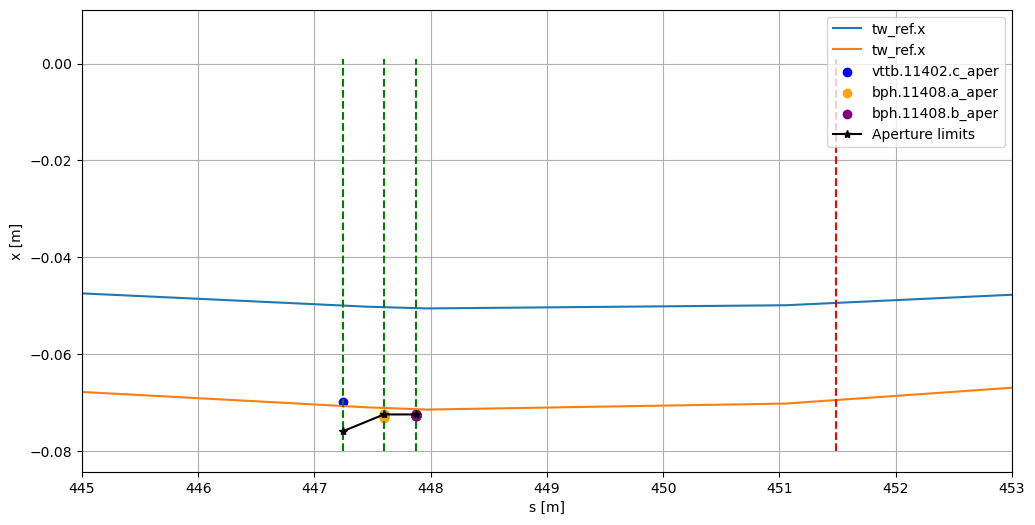

In [113]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.plot(tw_after.s, tw_after.x, label='tw_ref.x')
ax.plot(tw_after.s, tw_after.x + tw_after.dx * 2243/6000*(-0.016712203354411734), label='tw_ref.x')
ax.vlines(tw.s[5216], -0.08, 0.001, color='green', ls='--')
ax.vlines(tw.s[5227], -0.08, 0.001, color='green', ls='--')
ax.vlines(tw.s[5229], -0.08, 0.001, color='green', ls='--')
ax.vlines(tw.s[5241], -0.08, 0.001, color='red', ls='--')
ax.scatter(tw.s[5216]*np.ones(len(part.x[mask1])), part.x[mask1], color='blue', label='vttb.11402.c_aper')
ax.scatter(tw.s[5227]*np.ones(len(part.x[mask2])), part.x[mask2], color='orange', label='bph.11408.a_aper')
ax.scatter(tw.s[5229]*np.ones(len(part.x[mask3])), part.x[mask3], color='purple', label='bph.11408.b_aper')
ax.plot([tw.s[5216], tw.s[5227], tw.s[5229]],[ -line[5216].a, line[5227].min_x, line[5229].min_x], color='black',marker = '*', ls=None, label='Aperture limits'  )
ax.legend()
ax.set_xlabel('s [m]')
ax.set_ylabel('x [m]')
ax.grid()
ax.set_xlim(445, 453)

Conclusion: RF sweep as is with the bump is such that the particles are lost on aperture before the tidp (with still the question as to why the blue particle was lost)